# Линейные модели -- регрессия

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets

## Boston dataset 

In [2]:
# Boston dataset
# Bunch object
boston  = datasets.load_boston()

In [3]:
boston.keys() # что внутри

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston.feature_names  # какие атрибуты

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
# описание датасета Бостон

# MEDV - Median value of owner-occupied homes in $1000's
# Средняя стоимость дома, целевая переменная boston.target
# не входит в bosdon.datset

print(boston.DESCR[20:1237])          


Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by

In [6]:
# Создаем DataFrame из данных data без target

boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df["PRICE"] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
# Чистим данные

pd.isnull(boston_df).any()
pd.isna(boston_df).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

<Figure size 432x288 with 0 Axes>

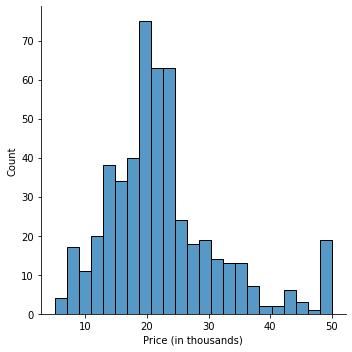

In [8]:
# Посмотрим распределение цены в этом этом датасете, т.е. 
# распределение  целевой переменной target

plt.figure(figsize=(6,4))
sns.displot(boston.target)

plt.xlabel("Price (in thousands)")
plt.ylabel("Count")
plt.tight_layout()

Corelation CRIM/PRIC: -0.3883046085868115

Correlation matrix:
              CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.1215

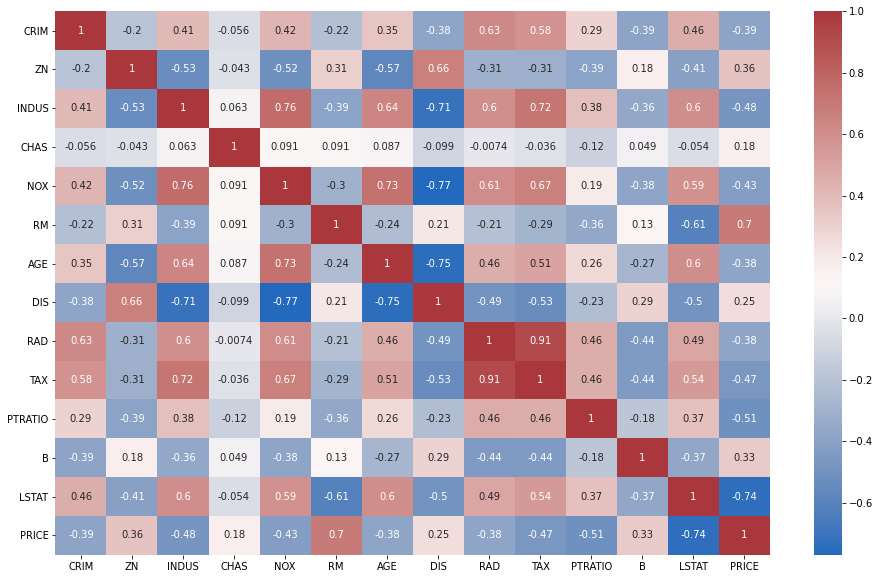

In [9]:
#
##   К О Р Р Е Л Я Ц И И  
#

print("Corelation CRIM/PRIC:", boston_df["CRIM"].corr(boston_df["PRICE"]))

print("\nCorrelation matrix:\n", boston_df.corr())

plt.figure(figsize=(16,10))
sns.heatmap(boston_df.corr(), cmap ="vlag" ,annot=True)
plt.show()

In [10]:
# Импортируем модуль для линейной регрисии
# Методом наименьших квадратов она ищет минимум линейного функционала

from sklearn.linear_model import LinearRegression

lin_regres = LinearRegression()

# обучение модели происходит методом fit()
model = lin_regres.fit(boston.data, boston.target)

In [11]:
help(lin_regres)

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subt

In [12]:
# See also
# Ridge: Ridge regression addresses some of the
#       problems of Ordinary Least Squares by imposing a penalty on the
#       size of the coefficients with l2 regularization.
#   Lasso : The Lasso is a linear model that estimates
#       sparse coefficients with l1 regularization.
#   ElasticNet : Elastic-Net is a linear regression
#       model trained with both l1 and l2 -norm regularization of the
#       coefficients.


from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [13]:
# весовые коэффициенты при атрибутах w1, w2, ... , w13
model.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [14]:
# свободный весовой коэффициент w0
model.intercept_

36.45948838509014

In [15]:
feature_weight_df = pd.DataFrame(list(zip(boston.feature_names, model.coef_)))
feature_weight_df.columns = ["Feature", "Weight"]
print(feature_weight_df)

    Feature     Weight
0      CRIM  -0.108011
1        ZN   0.046420
2     INDUS   0.020559
3      CHAS   2.686734
4       NOX -17.766611
5        RM   3.809865
6       AGE   0.000692
7       DIS  -1.475567
8       RAD   0.306049
9       TAX  -0.012335
10  PTRATIO  -0.952747
11        B   0.009312
12    LSTAT  -0.524758


Линейная регрессия для предсказания результата перемножает весовые коэффициенты с признаками:
    $$y = w_0 + w_1\cdot x_1 + w_2\cdot x_2 + ... + w_k\cdot x_k$$
Можно самостоятельно расчитать значение средней цены дома и сравнить с графиком ("навзгляд")

In [16]:
import operator

# w1*x1 + w2*x2 + ... + wk*xk
first_prediction = sum(map(
    lambda pair: operator.mul(*pair),
    zip(model.coef_, boston.data[1])
))

# + w0
first_prediction += model.intercept_

# предсказание для первой квартиры
print(first_prediction)

# ee цена
print(boston.target[0])

25.025562379053028
24.0


In [17]:
# то же самое для всей выборки
predictions = []
for i in range(0, boston.target.size):
    
    prediction = sum(map(
        lambda pair: operator.mul(*pair),
        zip(model.coef_, boston.data[i])
    )) + model.intercept_
    predictions.append(prediction)

# пары предсказание-цена
print(list(zip(predictions, boston.target))[0:5])

print("Средняя цена по предсказаниям:", pd.Series(predictions).mean())
print("Средняя цена:                 ", pd.Series(boston.target).mean())



[(30.00384337701673, 24.0), (25.025562379053028, 21.6), (30.567596718601585, 34.7), (28.60703648872812, 33.4), (27.943524232873006, 36.2)]
Средняя цена по предсказаниям: 22.53280632411067
Средняя цена:                  22.532806324110677


In [18]:
# Все это можно делать автоматически с помощью метода predict

predicted = model.predict(boston.data)
predicted[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

C:\Users\Alexander\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


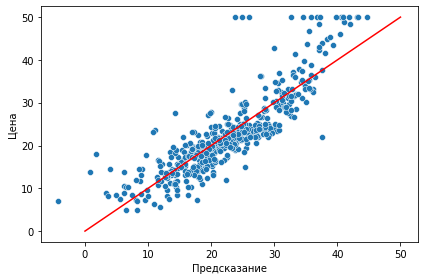

In [19]:
plt.figure(figsize=(6,4))
sns.scatterplot(predicted, boston.target)
plt.xlabel("Предсказание")
plt.ylabel("Цена")
plt.plot([0,50], [0,50], color="red")
plt.tight_layout()